In [16]:
# this version is using adjusted win rate

In [2]:
import itertools
import pandas as pd
from IPython.core.display import display, HTML

# Display settings to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

C:\Users\CC\AppData\Local\Temp\ipykernel_17988\1656442044.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
class Game:
    def __init__(self, teams):
        self.teams = teams
        self.num_teams = len(teams)
        self.win_rates = {team: 0 for team in teams}
        self.num_wins = {team: 0 for team in teams}
        self.total_games = {team: 0 for team in teams}
        self.matrix = []

################################################################################################################################

    def printMatrix(self):
        # Print the matrix for this outcome with exactly three decimal places
        print()
        print(f"Matrix for outcome: {outcome_bits}; (In a specific game, 0 means team1 wins and 1 means team2 wins; team1 is the team to the left)")
        print('Matrix columns: ')
        print('Match, Winner, Win_rate for team A,B,C,..., Predicted Winner')
        for row in game.matrix:
            formatted_row = ["{:.3f}".format(item) if isinstance(item, float) else item for item in row]
            print(formatted_row)

    def printUpsetRate(self, i, upset_rate_array):
        formatted_upset_rates = ["{:.3f}".format(rate) for rate in upset_rate_array]
        print("This game's Upset Rate is:", formatted_upset_rates[i])
        print("Historical Upset Rates are:", formatted_upset_rates)
        print("-------------------")  


################################################################################################################################
            
    def calculate_upset_rate(self): # Invoke once per match 
        num_upsets = 0
        total_games = len(self.matrix)  
        for row in self.matrix:
            if (row[-1] != "DRAW") & (row[1] != row[-1]):  # Actual winner != Predicted winner
                num_upsets += 1
        return num_upsets / total_games

    def calculate_upset_value(self): # Invoke once per match 
        num_upsets = 0
        for row in self.matrix:
            if (row[-1] != "DRAW") & (row[1] != row[-1]):  # Actual winner != Predicted winner
                num_upsets += 1
        return num_upsets


################################################################################################################################

    # def simulate_game_with_outcome(self, team1, team2, outcome):
    #     winner = team1 if outcome == 0 else team2
    #     # Make prediction based on win rates
    #     # if same win rates -> skip this match and consider it to be not upset, that is upset value += 0 
    #     if (self.win_rates[team1] != self.win_rates[team2]):
    #         predicted_winner = team2 if self.win_rates[team2] > self.win_rates[team1] else team1
    #         # Update win counts and total games played for each team
    #         self.num_wins[winner] += 1
    #         self.total_games[team1] += 1
    #         self.total_games[team2] += 1
    #         # Update win rates
    #         self.win_rates[team1] = (self.num_wins[team1] + 1) / (self.total_games[team1] + 2) # adjusted win rate
    #         self.win_rates[team2] = (self.num_wins[team2] + 1) / (self.total_games[team2] + 2) # adjusted win rate
    #         # Add data to matrix
    #         row = [f"{team1} vs {team2}", winner]
    #         row.extend([self.win_rates[team] for team in self.teams])
    #         row.append(predicted_winner)
            
    #         self.matrix.append(row)
        
    # def simulate_season_with_outcome(self, outcome_bits):
    #     i = 0
    #     for team1, team2 in itertools.combinations(self.teams, 2):
    #         self.simulate_game_with_outcome(team1, team2, outcome_bits[i])
    #         i += 1

################################################################################################################################
# change: Modified the simulation to just record the winner without updating win rates
    def static_simulate_season_with_outcome(self, outcome_bits):
        for i, (team1, team2) in enumerate(itertools.combinations(self.teams, 2)):
            self.static_simulate_game_with_outcome(team1, team2, outcome_bits[i])

    def static_simulate_game_with_outcome(self, team1, team2, outcome):
        winner = team1 if outcome == 0 else team2
        self.num_wins[winner] += 1
        self.total_games[team1] += 1
        self.total_games[team2] += 1

    def compute_final_win_rates(self):
        for team in self.teams:
            self.win_rates[team] = (self.num_wins[team] + 1) / (self.total_games[team] + 2)  # adjusted win rate

    def simulate_season_for_upsets(self, outcome_bits):
        for i, (team1, team2) in enumerate(itertools.combinations(self.teams, 2)):
            self.simulate_game_for_upsets(team1, team2, outcome_bits[i])

    def simulate_game_for_upsets(self, team1, team2, outcome):
        winner = team1 if outcome == 0 else team2
        if (self.num_wins[team2] == self.num_wins[team1]):
            predicted_winner = "DRAW"
            row = [f"{team1} vs {team2}", winner]
            row.extend([self.win_rates[team] for team in self.teams])
            row.append(predicted_winner)
            self.matrix.append(row)
        else:
            if (self.num_wins[team2] > self.num_wins[team1]):
                predicted_winner = team2
            else:
                predicted_winner = team1
            row = [f"{team1} vs {team2}", winner]
            row.extend([self.win_rates[team] for team in self.teams])
            row.append(predicted_winner)
            self.matrix.append(row)

    # def simulate_game_for_upsets_(self, team1, team2, outcome):
    #     winner = team1 if outcome == 0 else team2
    #     # Compare number of wins directly instead of win rates
    #     if self.num_wins[team1] != self.num_wins[team2]:
    #         predicted_winner = team2 if self.num_wins[team2] > self.num_wins[team1] else team1
    #         # A prediction is made only if one team has more wins than the other
    #         row = [f"{team1} vs {team2}", winner, self.num_wins[team1], self.num_wins[team2], predicted_winner]
    #     else:
    #         # If teams have the same number of wins, no prediction is made
    #         row = [f"{team1} vs {team2}", winner, self.num_wins[team1], self.num_wins[team2], 'No prediction']
    #     self.matrix.append(row)

################################################################################################################################
# client:
def normal_print(): # normal print: print the instant detail of the season (updated at the end of each game)
    game.printMatrix()
    game.printUpsetRate(game_index,upset_value_array)

def specific_print(situation_index): # specific print: print the information matrix for a specific game (updated at the end of each game)
    if(game_index == situation_index):
        game.printMatrix()
        game.printUpsetRate(game_index,upset_value_array)
        # Save this specific matrix to output.txt
        with open("output.txt", "w") as file:
            for row in game.matrix:
                formatted_row = ["{:.3f}".format(item) if isinstance(item, float) else item for item in row]
                file.write(", ".join(formatted_row) + "\n")


# Initialize the Game class
teams = ['A','B','C','D','E','F','G'] #input the teams as an string array. each string represent the team name, and thus representing a team 
game = Game(teams)

# Number of games for a season
num_games = len(list(itertools.combinations(teams, 2)))

# Walk through all possible outcomes (0 or 1 for each game, in a specific game, 0 means team1 wins and 1 means team2 wins )
all_possible_outcomes = itertools.product([0, 1], repeat=num_games)

# storing the upset rate of each possible outcome
upset_value_array = []

# Iterate through all possible outcomes
game_index = 0
for outcome_bits in all_possible_outcomes:
    # Resetting the game statistics for new simulation
    game.win_rates = {team: 0.5 for team in teams}
    game.num_wins = {team: 0 for team in teams}
    game.total_games = {team: 0 for team in teams}
    game.matrix = []

    # Execution process
    # change
    game.static_simulate_season_with_outcome(outcome_bits)
    game.compute_final_win_rates()
    game.simulate_season_for_upsets(outcome_bits)
    
    # Calculate the upset rate for this outcome
    upset_value = game.calculate_upset_value()
    upset_value_array.append(upset_value)

    #normal_print()
    specific_print(1105)


    # count the game index
    game_index+=1



print()
print('--finished--')




Matrix for outcome: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1); (In a specific game, 0 means team1 wins and 1 means team2 wins; team1 is the team to the left)
Matrix columns: 
Match, Winner, Win_rate for team A,B,C,..., Predicted Winner
['A vs B', 'A', '0.875', '0.625', '0.500', '0.375', '0.375', '0.250', '0.500', 'A']
['A vs C', 'A', '0.875', '0.625', '0.500', '0.375', '0.375', '0.250', '0.500', 'A']
['A vs D', 'A', '0.875', '0.625', '0.500', '0.375', '0.375', '0.250', '0.500', 'A']
['A vs E', 'A', '0.875', '0.625', '0.500', '0.375', '0.375', '0.250', '0.500', 'A']
['A vs F', 'A', '0.875', '0.625', '0.500', '0.375', '0.375', '0.250', '0.500', 'A']
['A vs G', 'A', '0.875', '0.625', '0.500', '0.375', '0.375', '0.250', '0.500', 'A']
['B vs C', 'B', '0.875', '0.625', '0.500', '0.375', '0.375', '0.250', '0.500', 'B']
['B vs D', 'B', '0.875', '0.625', '0.500', '0.375', '0.375', '0.250', '0.500', 'B']
['B vs E', 'B', '0.875', '0.625', '0.500', '0.375', '0.375', '0.250',

In [5]:
# finding the maximum of the list of upset array, and the index for that specific game
max = 0
for i in range(len(upset_value_array)):
    if(upset_value_array[max]<upset_value_array[i]):
        max = i

print(max)
print(upset_value_array[max])

1105
4


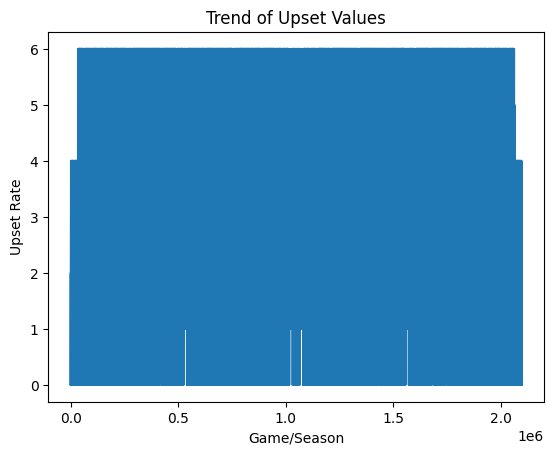

In [7]:
################################################################################################
#graph part#

import matplotlib.pyplot as plt

# Assuming upset_rates is sorted or represents some sequential data
# upset_rates = [...]



plt.plot(upset_value_array)
plt.title('Trend of Upset Values')
plt.xlabel('Game/Season')
plt.ylabel('Upset Rate')
plt.show()



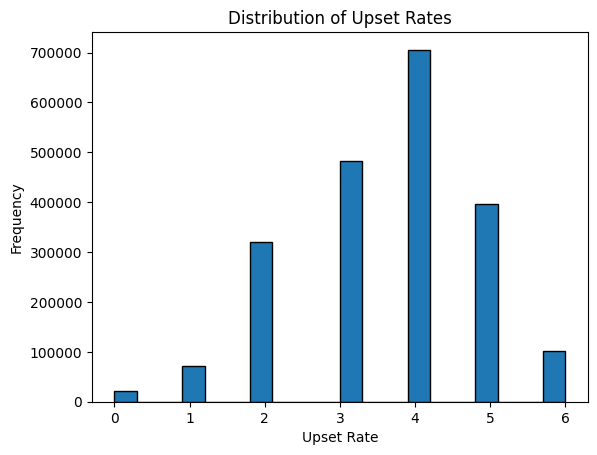

In [8]:

plt.hist(upset_value_array, bins=20, edgecolor='black')
plt.title('Distribution of Upset Rates')
plt.xlabel('Upset Rate')
plt.ylabel('Frequency')
plt.show()

In [24]:
# !pip install matplotlib seaborn


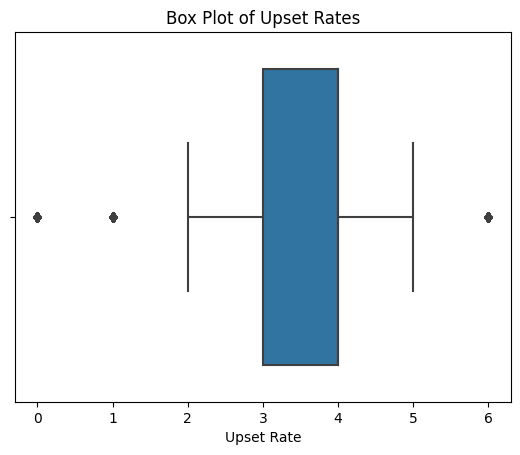

In [10]:

import seaborn as sns

sns.boxplot(x=upset_value_array)
plt.title('Box Plot of Upset Rates')
plt.xlabel('Upset Rate')
plt.show()
